In [89]:
import csv
from matplotlib import pyplot as plt
from functions import *
data_dicts=[]
with open('data.csv') as f:
    # we are using DictReader because we want our information to be in dictionary format.
    reader = csv.DictReader(f)
    # some more code
    for row in reader:
        data_dict = {}
        for key in [*row.keys()]:
            data_dict[key]=row[key]
        data_dicts.append(data_dict)
        
print(len(data_dicts))
print(data_dicts[0].keys())
# Txt File
top500_dicts=[]
text_file = open('top-500-songs.txt', 'r')
lines = text_file.readlines()
for line in lines:
    line=line.split('\t')
    info={}
    info['rank'],info['name'],info['artist'],info['year']=int(line[0]),line[1],line[2],int(line[3])
    top500_dicts.append(info)
print(top500_dicts[0])
#     print(int(line[-1]))

#Json
import json

file = open('track_data.json', 'r')
json_data = json.load(file)
print(json_data[0].keys())
print(json_data[10]['artist'])
print(len(json_data))


478
dict_keys(['number', 'year', 'album', 'artist', 'genre', 'subgenre'])
{'rank': 1, 'name': 'Like a Rolling Stone', 'artist': 'Bob Dylan', 'year': 1965}
dict_keys(['artist', 'album', 'tracks'])
Elvis Presley
478


In [83]:
#albumWithMostTopSongs 
#- returns the name of the artist and album that has that most songs featured on the top 500 songs list Maybe
def mostTopSongs(song_list,album_list):
    count,album=0,''
    for i in album_list:
        x=0
        for song in song_list:
            for track in i['tracks']:
                if song['name']==track:
                    x+=1
                    break

        if x>count:
            count=x
            album=i['album']
    return [album,count]
        
i,x=mostTopSongs(top500_dicts,json_data)
print(i,x)
        

Elvis Presley 8


In [76]:
#albumsWithTopSongs 
#- returns a list with the name of only the albums that have tracks featured on the list of top 500 songs Maybe
albums=[]
for i in json_data:
    x=0
    for song in top500_dicts:
        for track in i['tracks']:
            if song['name']==track:
                x+=1
                break
   
    if x>0:
        albums.append(i['album'])
        
print(len(albums))
print(len(set(albums)))

122
120


In [78]:
#songsThatAreOnTopAlbums 
#- returns a list with the name of only the songs featured on the list of top albums Confused
feature_songs=[]
for data_dict in data_dicts:
    feature_songs.append(find_name(data_dict['album'],json_data)['tracks'])
print(len(feature_songs))
print(feature_songs)

478
[["Sgt. Pepper's Lonely Hearts Club Band - Remix", 'With A Little Help From My Friends - Remix', 'Lucy In The Sky With Diamonds - Remix', 'Getting Better - Remix', 'Fixing A Hole - Remix', "She's Leaving Home - Remix", 'Being For The Benefit Of Mr. Kite! - Remix', 'Within You Without You - Remix', "When I'm Sixty-Four - Remix", 'Lovely Rita - Remix', 'Good Morning Good Morning - Remix', "Sgt. Pepper's Lonely Hearts Club Band (Reprise) - Remix", 'A Day In The Life - Remix', "Sgt. Pepper's Lonely Hearts Club Band - Take 9 And Speech", 'With A Little Help From My Friends - Take 1 / False Start And Take 2 / Instrumental', 'Lucy In The Sky With Diamonds - Take 1', 'Getting Better - Take 1 / Instrumental And Speech At The End', 'Fixing A Hole - Speech And Take 3', "She's Leaving Home - Take 1 / Instrumental", 'Being For The Benefit Of Mr. Kite! - Take 4', 'Within You Without You - Take 1 / Indian Instruments', "When I'm Sixty-Four - Take 2", 'Lovely Rita - Speech And Take 9', 'Good Morni

In [ ]:
#top10AlbumsByTopSongs 
#- returns a histogram with the 10 albums that have the most songs that appear in the top songs list. The album names should point to the number of songs that appear on the top 500 songs list. Confused
album_dict={}
test_list=json_data
for i in range(10):
    a,c=mostTopSongs(top500_dicts,test_list)
    album_dict[a]=c
    test_list[a]

In [99]:
print(len(list_artists(top500_dicts)))
print(len(list_artists(data_dicts)))
l=list_artists(data_dicts).extend(list_artists(top500_dicts))
# s=list_artists(top500_dicts)
# l.extend(s)
print(len(l))

500
478


TypeError: object of type 'NoneType' has no len()

In [101]:
#topOverallArtist 
#- Artist featured with the most songs and albums on the two lists. This means that if Brittany Spears had 3 of her albums featured on the top albums listed and 10 of her songs featured on the top songs, she would have a total of 13. The artist with the highest aggregate score would be the top overall artist. Easy
# artist_count={}
# artist_songs={}
# artist_albums={}

artists_songs = list_artists(top500_dicts)
artists_albums = list_artists(data_dicts)
artists_songs.extend(artists_albums)
# for artists in artists_list:
count,top_artist=0,''
for artist in list(set(artists_songs)):
    if artists_songs.count(artist)>count:
        count,top_artist = artists_songs.count(artist),artist
print(top_artist+":",count)
#     return top_artist


The Beatles: 33


In [63]:

find_artist('Bob Dylan', data_dicts)
print(find_artist('Bob Dylan', top500_dicts))
find_artist('Bob Dylan', json_data)

{'rank': 1, 'name': 'Like a Rolling Stone', 'artist': 'Bob Dylan', 'year': 1965}


{'artist': 'Bob Dylan',
 'album': 'Highway 61 Revisited',
 'tracks': ['Like a Rolling Stone',
  'Tombstone Blues',
  'It Takes a Lot to Laugh, It Takes a Train to Cry',
  'From a Buick 6',
  'Ballad of a Thin Man',
  'Queen Jane Approximately',
  'Highway 61 Revisited',
  "Just Like Tom Thumb's Blues",
  'Desolation Row']}

In [34]:
#Question: Most Popular Word in Album Titles
def pop_word(data):
    titles = list_titles(data)
    words=''
    count, top_word = 0,''
    for title in titles:
        title=title.replace('/',' ')
        title=title.replace('[','')
        words= words+' '+title.lower()
    for word in set(words.split()):
        if words.split().count(word)>count:
            count,top_word = words.split().count(word),word
    return top_word
# print(top_word+":",count)
pop_word(data_dicts)

'the'

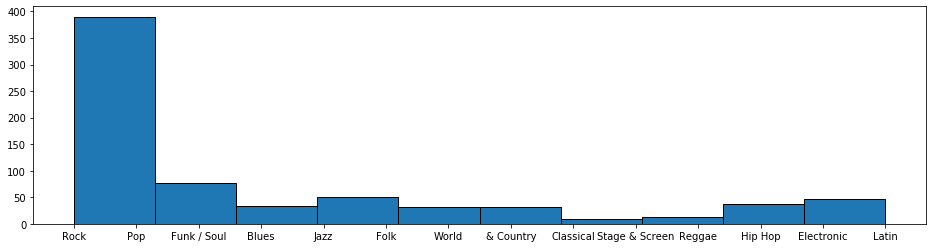

In [49]:
#HIstogram Albums by genre
def hist_genre(data):
    genres = []
    for data_dict in data:
        genre=data_dict['genre'].title().replace(', ',',').split(',')
    #     genre.replace(', ',',')

        genres.extend(genre)
    fig=plt.figure(figsize=(16,4))
    plt.hist(genres, edgecolor='black')
#     print(set(genres))
    plt.show()
hist_genre(data_dicts)